In [1]:
import time
import datetime
import pandas as pd
import yfinance as yf
from yahoo_fin.stock_info import get_data
import numpy as np


In [2]:
Commodity_2001 = get_data("DJI", start_date="7/11/2001", end_date="01/1/2002", index_as_date = True, interval="1d")
GOLD_2001 = get_data("GOLD", start_date="7/11/2001", end_date="01/01/2002", index_as_date = True, interval="1d")
RE_2001 = get_data("IYR", start_date="7/11/2001", end_date="01/01/2002", index_as_date = True, interval="1d")
Equity_2001 = get_data("SPY", start_date="7/11/2001", end_date="01/01/2002", index_as_date = True, interval="1d")
fixed_income_2001 = get_data("VBMFX", start_date="7/11/2001", end_date="01/01/2002", index_as_date = True, interval="1d")

frames_2001 = [Commodity_2001,GOLD_2001,RE_2001,Equity_2001,fixed_income_2001]
event_2001 = pd.concat(frames_2001).drop(columns = ['open','high','low','adjclose','volume'])

event_2001

,close,ticker
2001-07-11,10241.000000,DJI
2001-07-12,10479.000000,DJI
2001-07-13,10539.099609,DJI
2001-07-16,10472.099609,DJI
2001-07-17,10606.400391,DJI
...,...,...
2001-12-24,10.100000,VBMFX
2001-12-26,10.080000,VBMFX
2001-12-27,10.110000,VBMFX
2001-12-28,10.100000,VBMFX


In [ ]:
weight_event_2001 = [0.2,0.2,0.2,0.2,0.2]

In [3]:
print(event_2001.columns)

Index(['close', 'ticker'], dtype='object')


In [4]:
event_2001 = event_2001.pivot(columns='ticker')

In [5]:
event_2001

close                                         
ticker               DJI       GOLD        IYR         SPY  VBMFX
2001-07-11  10241.000000  15.310000  40.299999  118.379997  10.08
2001-07-12  10479.000000  15.310000  40.695000  121.190002  10.10
2001-07-13  10539.099609  15.290000  40.860001  122.239998  10.10
2001-07-16  10472.099609  14.950000  40.814999  120.709999  10.11
2001-07-17  10606.400391  15.180000  40.834999  121.839996  10.12
...                  ...        ...        ...         ...    ...
2001-12-24  10035.299805  16.290001  39.750000  114.730003  10.10
2001-12-26  10088.099609  16.000000  39.799999  115.360001  10.08
2001-12-27  10131.299805  15.870000  39.900002  116.059998  10.11
2001-12-28  10137.000000  15.800000  40.125000  116.000000  10.10
2001-12-31  10021.500000  15.950000  39.900002  114.300003  10.14

[117 rows x 5 columns]

In [6]:
print(event_2001.columns)

MultiIndex([('close',   'DJI'),
            ('close',  'GOLD'),
            ('close',   'IYR'),
            ('close',   'SPY'),
            ('close', 'VBMFX')],
           names=[None, 'ticker'])


In [7]:
event_2001.describe

<bound method NDFrame.describe of                    close                                         
ticker               DJI       GOLD        IYR         SPY  VBMFX
2001-07-11  10241.000000  15.310000  40.299999  118.379997  10.08
2001-07-12  10479.000000  15.310000  40.695000  121.190002  10.10
2001-07-13  10539.099609  15.290000  40.860001  122.239998  10.10
2001-07-16  10472.099609  14.950000  40.814999  120.709999  10.11
2001-07-17  10606.400391  15.180000  40.834999  121.839996  10.12
...                  ...        ...        ...         ...    ...
2001-12-24  10035.299805  16.290001  39.750000  114.730003  10.10
2001-12-26  10088.099609  16.000000  39.799999  115.360001  10.08
2001-12-27  10131.299805  15.870000  39.900002  116.059998  10.11
2001-12-28  10137.000000  15.800000  40.125000  116.000000  10.10
2001-12-31  10021.500000  15.950000  39.900002  114.300003  10.14

[117 rows x 5 columns]>

In [8]:
# Calculate daily returns using the combined portfolio
daily_returns_event_2001 = event_2001.pct_change().dropna()

In [9]:
daily_returns_event_2001

close                                        
ticker           DJI      GOLD       IYR       SPY     VBMFX
2001-07-12  0.023240  0.000000  0.009802  0.023737  0.001984
2001-07-13  0.005735 -0.001306  0.004055  0.008664  0.000000
2001-07-16 -0.006357 -0.022237 -0.001101 -0.012516  0.000990
2001-07-17  0.012825  0.015385  0.000490  0.009361  0.000989
2001-07-18 -0.003451  0.021739  0.006367 -0.006812  0.003953
...              ...       ...       ...       ...       ...
2001-12-24  0.000000  0.001845  0.006966 -0.001914 -0.001976
2001-12-26  0.005261 -0.017802  0.001258  0.005491 -0.001980
2001-12-27  0.004282 -0.008125  0.002513  0.006068  0.002976
2001-12-28  0.000563 -0.004411  0.005639 -0.000517 -0.000989
2001-12-31 -0.011394  0.009494 -0.005607 -0.014655  0.003960

[116 rows x 5 columns]

In [10]:
# To calculate the annualized average return of event_2001,
trading_days_event_2001 = 117
average_annual_return__event_2001 = daily_returns_event_2001.mean() * trading_days_event_2001

In [11]:
average_annual_return__event_2001

       ticker
close  DJI      -0.010204
       GOLD      0.066823
       IYR      -0.005174
       SPY      -0.025180
       VBMFX     0.006480
dtype: float64

In [38]:
# To calculate the annualized standard deviation,
# multiply the standard deviation (std) for the daily_returns_a_b DataFrame
# by the square root (np.sqrt) of the number of trading days in the year
annual_std_dev_event_2001 = daily_returns_event_2001.std() * np.sqrt(252)

In [39]:
annual_std_dev_event_2001

       ticker
close  DJI       0.223759
       GOLD      0.333721
       IYR       0.145303
       SPY       0.209962
       VBMFX     0.046309
dtype: float64

In [40]:
# Calculate Sharpe Ratio by dividing the average annual return by the standard deviation
sharpe_ratios_event_2001 = average_annual_return__event_2001 / annual_std_dev_event_2001

In [41]:
sharpe_ratios_event_2001

       ticker
close  DJI      -0.045603
       GOLD      0.200236
       IYR      -0.035611
       SPY      -0.119927
       VBMFX     0.139937
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios - Event 2001'}, xlabel='None,ticker'>

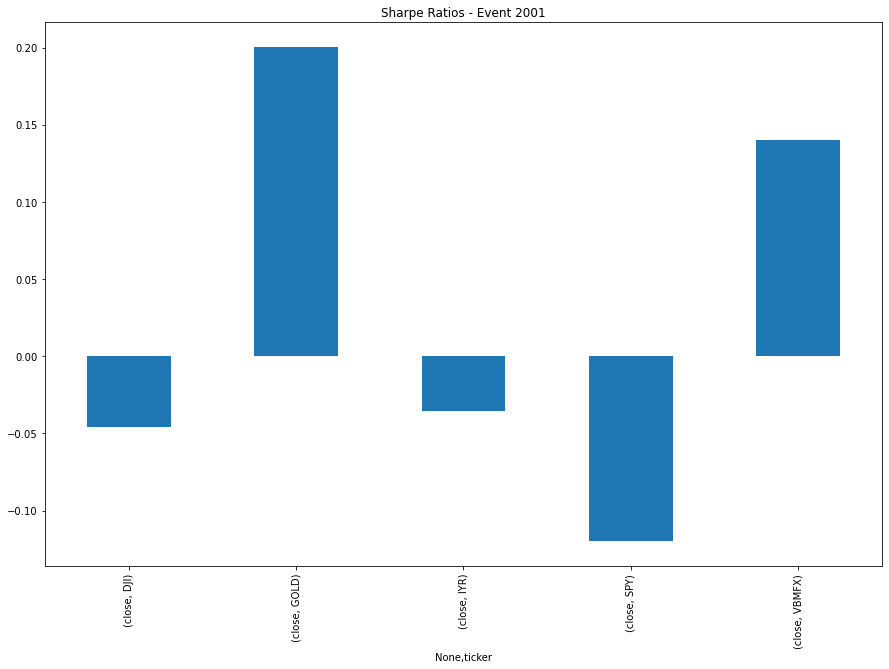

In [83]:
# Plotting the sharp ratios for securities
sharpe_ratios_event_2001.plot.bar(figsize=(15, 10), title="Sharpe Ratios - Event 2001")

In [43]:
import matplotlib.pyplot as plt

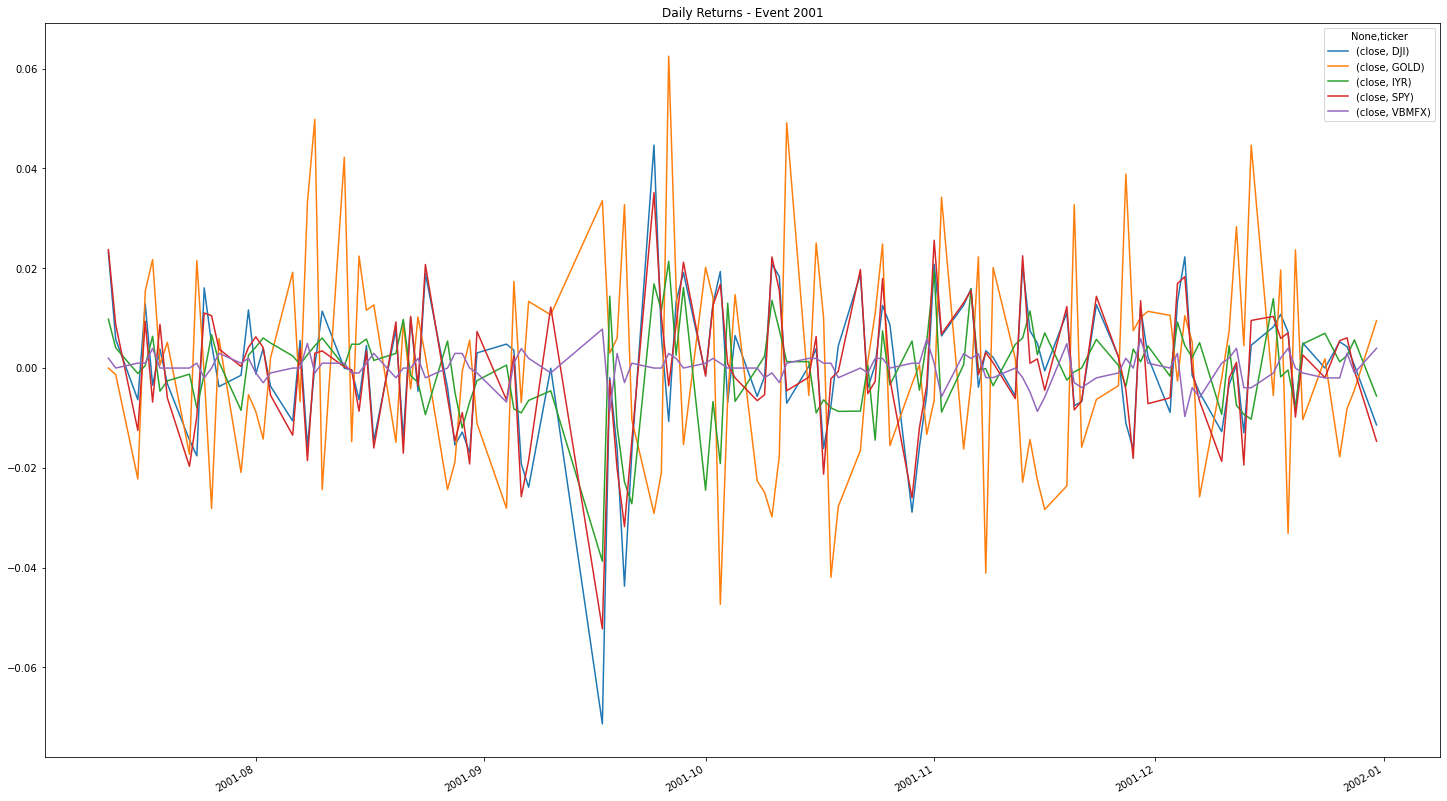

In [44]:
# Plotting the daily returns for securities
daily_returns_event_2001.plot(figsize=(25, 15), title="Daily Returns - Event 2001")
plt.savefig('sample.png')

In [18]:
Commodity_2003 = get_data("DJI", start_date="1/20/2003", end_date="07/20/2003", index_as_date = True, interval="1d")
GOLD_2003 = get_data("GOLD", start_date="1/20/2003", end_date="07/20/2003", index_as_date = True, interval="1d")
RE_2003 = get_data("IYR", start_date="1/20/2003", end_date="07/20/2003", index_as_date = True, interval="1d")
Equity_2003 = get_data("SPY", start_date="1/20/2003", end_date="07/20/2003", index_as_date = True, interval="1d")
fixed_income_2003 = get_data("VBMFX", start_date="1/20/2003", end_date="07/20/2003", index_as_date = True, interval="1d")

frames_2003 = [Commodity_2003,GOLD_2003,RE_2003,Equity_2003,fixed_income_2003]
event_2003 = pd.concat(frames_2003).drop(columns = ['open','high','low','adjclose','volume'])

event_2003

,close,ticker
2003-01-21,8442.900391,DJI
2003-01-22,8318.730469,DJI
2003-01-23,8369.469727,DJI
2003-01-24,8131.009766,DJI
2003-01-27,7989.560059,DJI
...,...,...
2003-07-14,10.450000,VBMFX
2003-07-15,10.380000,VBMFX
2003-07-16,10.370000,VBMFX
2003-07-17,10.370000,VBMFX


In [19]:
event_2003 = event_2003.pivot(columns='ticker')

In [20]:
event_2003

close                                         
ticker              DJI       GOLD        IYR         SPY  VBMFX
2003-01-21  8442.900391  15.670000  37.084999   89.250000  10.34
2003-01-22  8318.730469  16.040001  37.125000   88.169998  10.36
2003-01-23  8369.469727  16.750000  37.220001   88.709999  10.35
2003-01-24  8131.009766  17.190001  36.880001   86.379997  10.36
2003-01-27  7989.560059  16.420000  36.549999   85.199997  10.34
...                 ...        ...        ...         ...    ...
2003-07-14  9177.150391  17.400000  44.044998  100.730003  10.45
2003-07-15  9128.969727  16.980000  43.959999  100.510002  10.38
2003-07-16  9094.589844  16.830000  43.994999   99.919998  10.37
2003-07-17  9050.820312  16.950001  43.445000   98.500000  10.37
2003-07-18  9188.150391  16.889999  43.570000   99.510002  10.36

[125 rows x 5 columns]

In [23]:
print(event_2003.columns)

MultiIndex([('close',   'DJI'),
            ('close',  'GOLD'),
            ('close',   'IYR'),
            ('close',   'SPY'),
            ('close', 'VBMFX')],
           names=[None, 'ticker'])


In [24]:
event_2003.describe

<bound method NDFrame.describe of                   close                                         
ticker              DJI       GOLD        IYR         SPY  VBMFX
2003-01-21  8442.900391  15.670000  37.084999   89.250000  10.34
2003-01-22  8318.730469  16.040001  37.125000   88.169998  10.36
2003-01-23  8369.469727  16.750000  37.220001   88.709999  10.35
2003-01-24  8131.009766  17.190001  36.880001   86.379997  10.36
2003-01-27  7989.560059  16.420000  36.549999   85.199997  10.34
...                 ...        ...        ...         ...    ...
2003-07-14  9177.150391  17.400000  44.044998  100.730003  10.45
2003-07-15  9128.969727  16.980000  43.959999  100.510002  10.38
2003-07-16  9094.589844  16.830000  43.994999   99.919998  10.37
2003-07-17  9050.820312  16.950001  43.445000   98.500000  10.37
2003-07-18  9188.150391  16.889999  43.570000   99.510002  10.36

[125 rows x 5 columns]>

In [25]:
# Calculate daily returns using the combined portfolio
daily_returns_event_2003 = event_2003.pct_change().dropna()

In [26]:
daily_returns_event_2003

close                                        
ticker           DJI      GOLD       IYR       SPY     VBMFX
2003-01-22 -0.014707  0.023612  0.001079 -0.012101  0.001934
2003-01-23  0.006099  0.044264  0.002559  0.006125 -0.000965
2003-01-24 -0.028492  0.026269 -0.009135 -0.026265  0.000966
2003-01-27 -0.017396 -0.044794 -0.008948 -0.013661 -0.001930
2003-01-28  0.012426  0.020097  0.003694  0.007394 -0.000967
...              ...       ...       ...       ...       ...
2003-07-14  0.006312  0.002304  0.009396  0.004888 -0.003813
2003-07-15 -0.005250 -0.024138 -0.001930 -0.002184 -0.006699
2003-07-16 -0.003766 -0.008834  0.000796 -0.005870 -0.000963
2003-07-17 -0.004813  0.007130 -0.012501 -0.014211  0.000000
2003-07-18  0.015173 -0.003540  0.002877  0.010254 -0.000964

[124 rows x 5 columns]

In [27]:
# To calculate the annualized average return of event_2001,
trading_days_event_2003 = 125
average_annual_return__event_2003 = daily_returns_event_2003.mean() * trading_days_event_2003

In [28]:
average_annual_return__event_2003

       ticker
close  DJI       0.094825
       GOLD      0.100414
       IYR       0.167503
       SPY       0.119107
       VBMFX     0.002231
dtype: float64

In [45]:
# To calculate the annualized standard deviation,
# multiply the standard deviation (std) for the daily_returns_a_b DataFrame
# by the square root (np.sqrt) of the number of trading days in the year
annual_std_dev_event_2003 = daily_returns_event_2003.std() * np.sqrt(252)

In [46]:
annual_std_dev_event_2003

       ticker
close  DJI       0.196903
       GOLD      0.318313
       IYR       0.141627
       SPY       0.195129
       VBMFX     0.033903
dtype: float64

In [47]:
# Calculate Sharpe Ratio by dividing the average annual return by the standard deviation
sharpe_ratios_event_2003 = average_annual_return__event_2003 / annual_std_dev_event_2003

In [48]:
sharpe_ratios_event_2003

       ticker
close  DJI       0.481580
       GOLD      0.315458
       IYR       1.182713
       SPY       0.610399
       VBMFX     0.065801
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios - Event 2003'}, xlabel='None,ticker'>

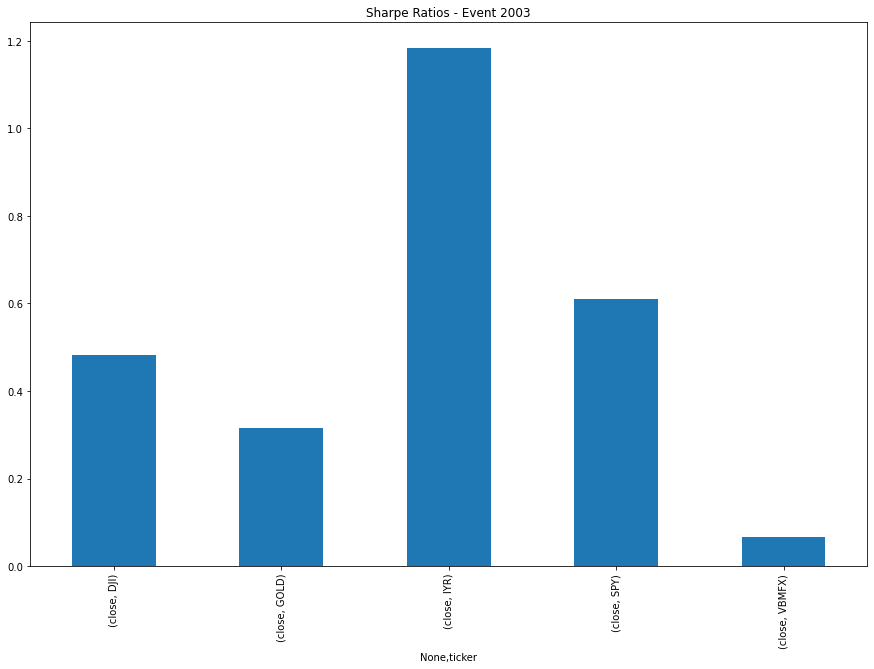

In [82]:
# Plotting the sharp ratios for securities
sharpe_ratios_event_2003.plot.bar(figsize=(15, 10), title="Sharpe Ratios - Event 2003")

<AxesSubplot:title={'center':'Daily Returns - Event 2003'}>

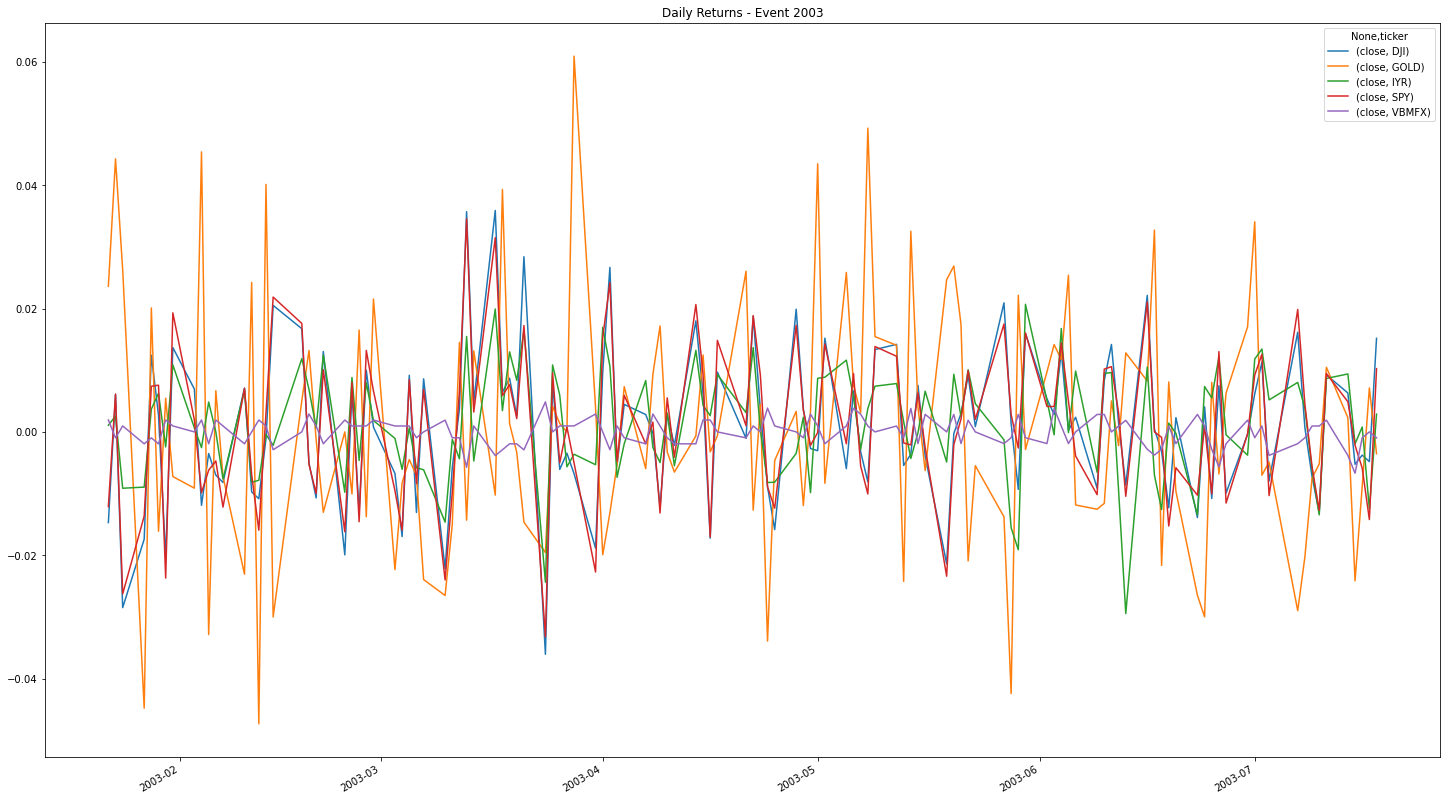

In [50]:
# Plotting the daily returns for securities
daily_returns_event_2003.plot(figsize=(25, 15), title="Daily Returns - Event 2003")

In [59]:
Commodity_2008 = get_data("DJI", start_date="1/1/2008", end_date="12/01/2009", index_as_date = True, interval="1d")
GOLD_2008 = get_data("GOLD", start_date="1/1/2008", end_date="12/01/2009", index_as_date = True, interval="1d")
RE_2008 = get_data("IYR", start_date="1/1/2008", end_date="12/01/2009", index_as_date = True, interval="1d")
Equity_2008 = get_data("SPY", start_date="1/1/2008", end_date="12/01/2009", index_as_date = True, interval="1d")
fixed_income_2008 = get_data("VBMFX", start_date="1/1/2008", end_date="12/01/2009", index_as_date = True, interval="1d")

frames_2008 = [Commodity_2008,GOLD_2008,RE_2008,Equity_2008,fixed_income_2008]
event_2008 = pd.concat(frames_2008).drop(columns = ['open','high','low','adjclose','volume'])

event_2008

,close,ticker
2008-01-02,13044.000000,DJI
2008-01-03,13056.700195,DJI
2008-01-04,12800.200195,DJI
2008-01-07,12827.500000,DJI
2008-01-08,12589.099609,DJI
...,...,...
2009-11-23,10.500000,VBMFX
2009-11-24,10.520000,VBMFX
2009-11-25,10.540000,VBMFX
2009-11-27,10.550000,VBMFX


In [60]:
event_2008 = event_2008.pivot(columns='ticker')

In [61]:
event_2008

close                                         
ticker               DJI       GOLD        IYR         SPY  VBMFX
2008-01-02  13044.000000  46.020000  65.150002  144.929993  10.22
2008-01-03  13056.700195  48.709999  63.040001  144.860001  10.22
2008-01-04  12800.200195  47.930000  61.040001  141.309998  10.25
2008-01-07  12827.500000  47.240002  61.610001  141.190002  10.25
2008-01-08  12589.099609  49.279999  59.369999  138.910004  10.25
...                  ...        ...        ...         ...    ...
2009-11-23  10451.000000  43.880001  43.540001  110.820000  10.50
2009-11-24  10433.700195  43.220001  42.900002  110.989998  10.52
2009-11-25  10464.400391  43.990002  43.070000  111.379997  10.54
2009-11-27  10309.900391  42.540001  41.849998  109.570000  10.55
2009-11-30  10344.799805  42.689999  43.419998  109.940002  10.56

[483 rows x 5 columns]

In [62]:
print(event_2003.columns)

MultiIndex([('close',   'DJI'),
            ('close',  'GOLD'),
            ('close',   'IYR'),
            ('close',   'SPY'),
            ('close', 'VBMFX')],
           names=[None, 'ticker'])


In [63]:
event_2003.describe

<bound method NDFrame.describe of                   close                                         
ticker              DJI       GOLD        IYR         SPY  VBMFX
2003-01-21  8442.900391  15.670000  37.084999   89.250000  10.34
2003-01-22  8318.730469  16.040001  37.125000   88.169998  10.36
2003-01-23  8369.469727  16.750000  37.220001   88.709999  10.35
2003-01-24  8131.009766  17.190001  36.880001   86.379997  10.36
2003-01-27  7989.560059  16.420000  36.549999   85.199997  10.34
...                 ...        ...        ...         ...    ...
2003-07-14  9177.150391  17.400000  44.044998  100.730003  10.45
2003-07-15  9128.969727  16.980000  43.959999  100.510002  10.38
2003-07-16  9094.589844  16.830000  43.994999   99.919998  10.37
2003-07-17  9050.820312  16.950001  43.445000   98.500000  10.37
2003-07-18  9188.150391  16.889999  43.570000   99.510002  10.36

[125 rows x 5 columns]>

In [64]:
# Calculate daily returns using the combined portfolio
daily_returns_event_2008 = event_2008.pct_change().dropna()

In [65]:
daily_returns_event_2008

close                                        
ticker           DJI      GOLD       IYR       SPY     VBMFX
2008-01-03  0.000974  0.058453 -0.032387 -0.000483  0.000000
2008-01-04 -0.019645 -0.016013 -0.031726 -0.024506  0.002935
2008-01-07  0.002133 -0.014396  0.009338 -0.000849  0.000000
2008-01-08 -0.018585  0.043184 -0.036358 -0.016148  0.000000
2008-01-09  0.011613  0.015219  0.019707  0.010510  0.000976
...              ...       ...       ...       ...       ...
2009-11-23  0.012870 -0.002274  0.011382  0.012702  0.000000
2009-11-24 -0.001655 -0.015041 -0.014699  0.001534  0.001905
2009-11-25  0.002942  0.017816  0.003963  0.003514  0.001901
2009-11-27 -0.014764 -0.032962 -0.028326 -0.016251  0.000949
2009-11-30  0.003385  0.003526  0.037515  0.003377  0.000948

[482 rows x 5 columns]

In [68]:
# To calculate the annualized average return of event_2001,
trading_days_event_2008 = 483
average_annual_return__event_2008 = daily_returns_event_2008.mean() * trading_days_event_2008

In [69]:
average_annual_return__event_2008

       ticker
close  DJI      -0.131661
       GOLD      0.364374
       IYR       0.034966
       SPY      -0.156495
       VBMFX     0.035522
dtype: float64

In [72]:
daily_std_dev_event_2008 = daily_returns_event_2008.std()

In [73]:
daily_std_dev_event_2008

       ticker
close  DJI       0.020460
       GOLD      0.043116
       IYR       0.042743
       SPY       0.022385
       VBMFX     0.003364
dtype: float64

In [74]:
# To calculate the annualized standard deviation,
# multiply the standard deviation (std) for the daily_returns_a_b DataFrame
# by the square root (np.sqrt) of the number of trading days in the year
annual_std_dev_event_2008 = daily_returns_event_2008.std() * np.sqrt(252)

In [75]:
annual_std_dev_event_2008

       ticker
close  DJI       0.324794
       GOLD      0.684451
       IYR       0.678519
       SPY       0.355349
       VBMFX     0.053396
dtype: float64

In [76]:
# Calculate Sharpe Ratio by dividing the average annual return by the standard deviation
sharpe_ratios_event_2008 = average_annual_return__event_2008 / annual_std_dev_event_2008

In [77]:
sharpe_ratios_event_2008

       ticker
close  DJI      -0.405366
       GOLD      0.532360
       IYR       0.051532
       SPY      -0.440398
       VBMFX     0.665253
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios - Event 2008'}, xlabel='None,ticker'>

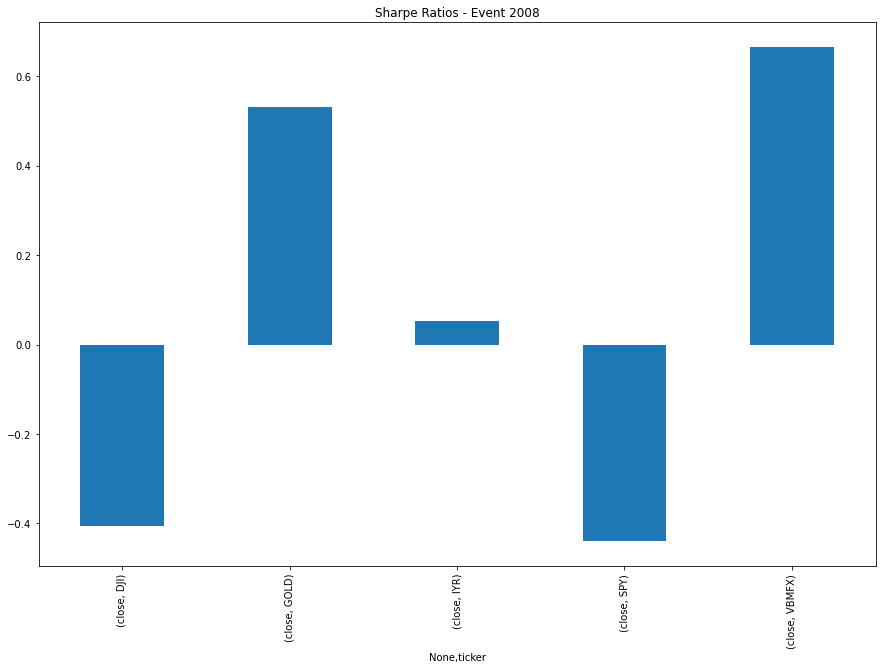

In [81]:
# Plotting the sharp ratios for securities
sharpe_ratios_event_2008.plot.bar(figsize=(15, 10), title="Sharpe Ratios - Event 2008")

<AxesSubplot:title={'center':'Daily Returns - Event 2008'}>

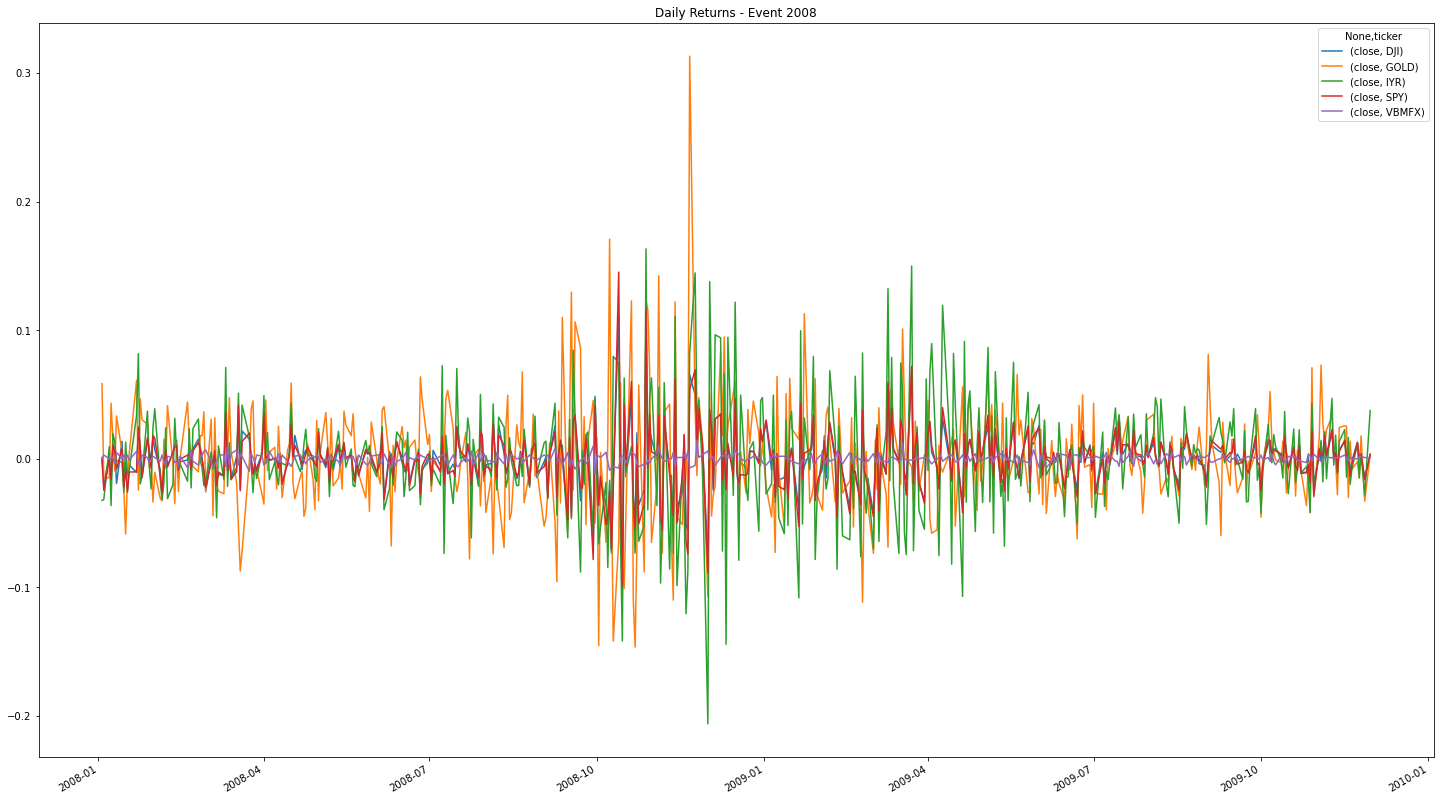

In [80]:
# Plotting the daily returns for securities
daily_returns_event_2008.plot(figsize=(25, 15), title="Daily Returns - Event 2008")

In [84]:
Commodity_2020 = get_data("DJI", start_date="1/1/2020", end_date="6/1/2020", index_as_date = True, interval="1d")
GOLD_2020 = get_data("GOLD", start_date="1/1/2020", end_date="6/1/2020", index_as_date = True, interval="1d")
RE_2020 = get_data("IYR", start_date="1/1/2020", end_date="6/1/2020", index_as_date = True, interval="1d")
Equity_2020 = get_data("SPY", start_date="1/1/2020", end_date="6/1/2020", index_as_date = True, interval="1d")
fixed_income_2020 = get_data("VBMFX", start_date="1/1/2020", end_date="6/1/2020", index_as_date = True, interval="1d")

frames_2020 = [Commodity_2020,GOLD_2020,RE_2020,Equity_2020,fixed_income_2020]
event_2020 = pd.concat(frames_2020).drop(columns = ['open','high','low','adjclose','volume'])

event_2020

,close,ticker
2020-01-03,28634.900391,DJI
2020-01-06,28703.400391,DJI
2020-01-07,28583.699219,DJI
2020-01-08,28745.099609,DJI
2020-01-09,28956.900391,DJI
...,...,...
2020-05-22,11.530000,VBMFX
2020-05-26,11.520000,VBMFX
2020-05-27,11.520000,VBMFX
2020-05-28,11.520000,VBMFX


In [85]:
event_2020 = event_2020.pivot(columns='ticker')

In [86]:
event_2020

close                                         
ticker               DJI       GOLD        IYR         SPY  VBMFX
2020-01-02           NaN  18.490000  92.050003  324.869995  11.08
2020-01-03  28634.900391  18.570000  92.709999  322.410004  11.12
2020-01-06  28703.400391  18.389999  92.790001  323.640015  11.11
2020-01-07  28583.699219  18.469999  91.849998  322.730011  11.09
2020-01-08  28745.099609  17.820000  92.070000  324.450012  11.07
...                  ...        ...        ...         ...    ...
2020-05-22  24465.199219  26.320000  73.750000  295.440002  11.53
2020-05-26  24995.099609  24.730000  76.440002  299.079987  11.52
2020-05-27  25548.300781  23.920000  77.910004  303.529999  11.52
2020-05-28  25400.599609  23.950001  78.230003  302.970001  11.52
2020-05-29  25383.099609  24.000000  77.419998  304.320007  11.55

[103 rows x 5 columns]

In [88]:
event_2020.describe

<bound method NDFrame.describe of                    close                                         
ticker               DJI       GOLD        IYR         SPY  VBMFX
2020-01-02           NaN  18.490000  92.050003  324.869995  11.08
2020-01-03  28634.900391  18.570000  92.709999  322.410004  11.12
2020-01-06  28703.400391  18.389999  92.790001  323.640015  11.11
2020-01-07  28583.699219  18.469999  91.849998  322.730011  11.09
2020-01-08  28745.099609  17.820000  92.070000  324.450012  11.07
...                  ...        ...        ...         ...    ...
2020-05-22  24465.199219  26.320000  73.750000  295.440002  11.53
2020-05-26  24995.099609  24.730000  76.440002  299.079987  11.52
2020-05-27  25548.300781  23.920000  77.910004  303.529999  11.52
2020-05-28  25400.599609  23.950001  78.230003  302.970001  11.52
2020-05-29  25383.099609  24.000000  77.419998  304.320007  11.55

[103 rows x 5 columns]>

In [89]:
# Calculate daily returns using the combined portfolio
daily_returns_event_2020 = event_2020.pct_change().dropna()

In [90]:
daily_returns_event_2020

close                                        
ticker           DJI      GOLD       IYR       SPY     VBMFX
2020-01-06  0.002392 -0.009693  0.000863  0.003815 -0.000899
2020-01-07 -0.004170  0.004350 -0.010130 -0.002812 -0.001800
2020-01-08  0.005647 -0.035192  0.002395  0.005330 -0.001803
2020-01-09  0.007368 -0.012346  0.000543  0.006781  0.000903
2020-01-10 -0.004596  0.014205  0.008684 -0.002878  0.001805
...              ...       ...       ...       ...       ...
2020-05-22 -0.000364  0.002285  0.013606  0.001899  0.000868
2020-05-26  0.021659 -0.060410  0.036475  0.012321 -0.000867
2020-05-27  0.022132 -0.032754  0.019231  0.014879  0.000000
2020-05-28 -0.005781  0.001254  0.004107 -0.001845  0.000000
2020-05-29 -0.000689  0.002088 -0.010354  0.004456  0.002604

[101 rows x 5 columns]

In [91]:
# To calculate the annualized average return of event_2001,
trading_days_event_2020 = 102
average_annual_return__event_2020 = daily_returns_event_2020.mean() * trading_days_event_2020

In [92]:
average_annual_return__event_2020

       ticker
close  DJI      -0.065275
       GOLD      0.332867
       IYR      -0.111522
       SPY      -0.011740
       VBMFX     0.039295
dtype: float64

In [93]:
daily_std_dev_event_2020 = daily_returns_event_2020.std()

In [94]:
daily_std_dev_event_2020

       ticker
close  DJI       0.033277
       GOLD      0.038298
       IYR       0.036794
       SPY       0.030228
       VBMFX     0.004381
dtype: float64

In [95]:
# To calculate the annualized standard deviation,
# multiply the standard deviation (std) for the daily_returns_a_b DataFrame
# by the square root (np.sqrt) of the number of trading days in the year
annual_std_dev_event_2020 = daily_returns_event_2020.std() * np.sqrt(252)

In [96]:
annual_std_dev_event_2020

       ticker
close  DJI       0.528258
       GOLD      0.607970
       IYR       0.584090
       SPY       0.479857
       VBMFX     0.069540
dtype: float64

In [98]:
# Calculate Sharpe Ratio by dividing the average annual return by the standard deviation
sharpe_ratios_event_2020 = average_annual_return__event_2020 / annual_std_dev_event_2020

In [99]:
sharpe_ratios_event_2020

       ticker
close  DJI      -0.123566
       GOLD      0.547506
       IYR      -0.190933
       SPY      -0.024466
       VBMFX     0.565063
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios - Event 2020'}, xlabel='None,ticker'>

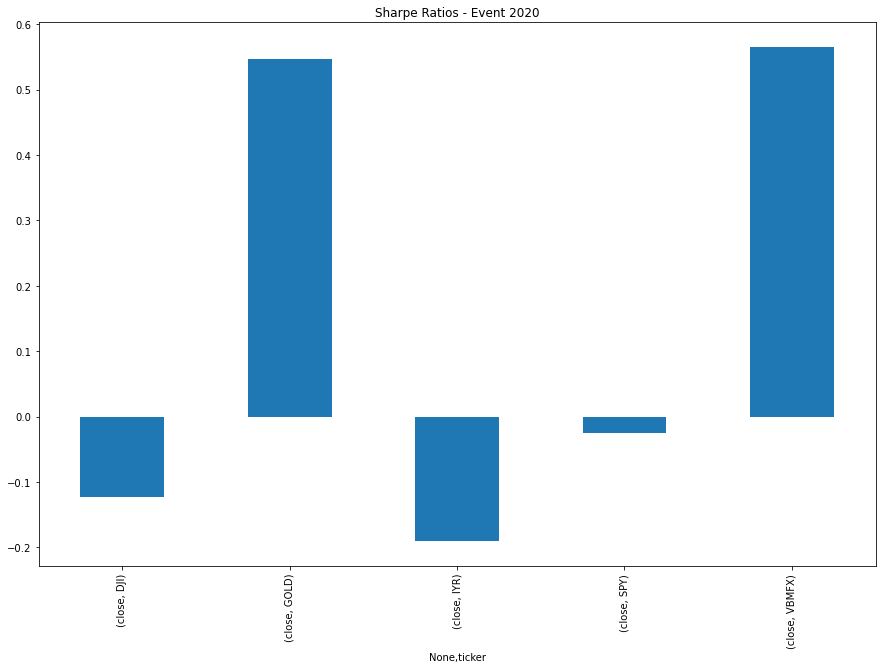

In [100]:
# Plotting the sharp ratios for securities
sharpe_ratios_event_2020.plot.bar(figsize=(15, 10), title="Sharpe Ratios - Event 2020")

<AxesSubplot:title={'center':'Daily Returns - Event 2020'}>

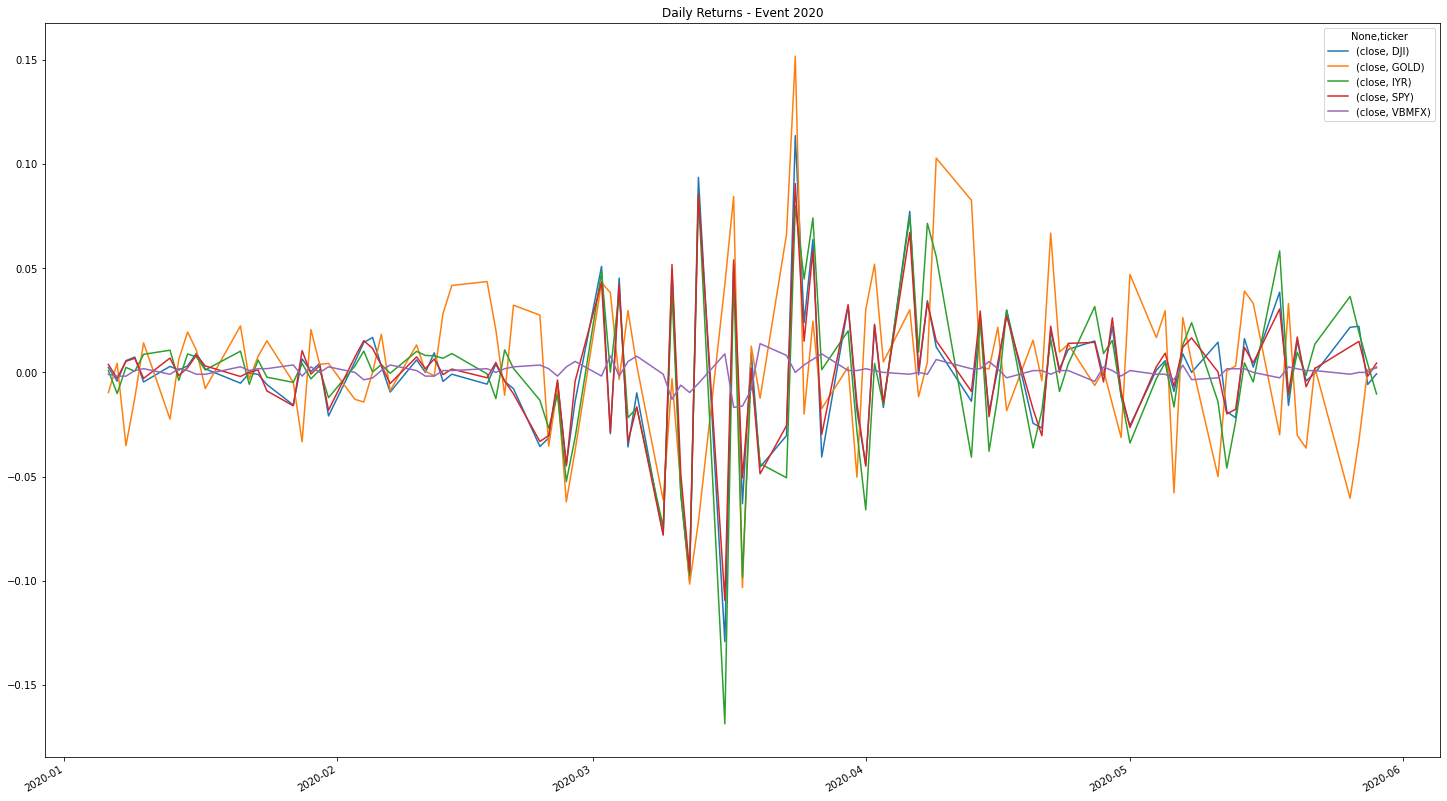

In [101]:
# Plotting the daily returns for securities
daily_returns_event_2020.plot(figsize=(25, 15), title="Daily Returns - Event 2020")

In [102]:
Commodity_2022 = get_data("DJI", start_date="1/1/2022", end_date="5/13/2022", index_as_date = True, interval="1d")
GOLD_2022 = get_data("GOLD", start_date="1/1/2022", end_date="5/13/2022", index_as_date = True, interval="1d")
RE_2022 = get_data("IYR", start_date="1/1/2022", end_date="5/13/2022", index_as_date = True, interval="1d")
Equity_2022 = get_data("SPY", start_date="1/1/2022", end_date="5/13/2022", index_as_date = True, interval="1d")
fixed_income_2022 = get_data("VBMFX", start_date="1/1/2022", end_date="5/13/2022", index_as_date = True, interval="1d")

frames_2022 = [Commodity_2022,GOLD_2022,RE_2022,Equity_2022,fixed_income_2022]
event_2022 = pd.concat(frames_2022).drop(columns = ['open','high','low','adjclose','volume'])

event_2022

,close,ticker
2022-01-03,36585.101562,DJI
2022-01-04,36799.699219,DJI
2022-01-05,36407.101562,DJI
2022-01-06,36236.500000,DJI
2022-01-07,36231.699219,DJI
...,...,...
2022-05-06,9.930000,VBMFX
2022-05-09,9.970000,VBMFX
2022-05-10,9.990000,VBMFX
2022-05-11,10.030000,VBMFX


In [103]:
event_2022 = event_2022.pivot(columns='ticker')

In [104]:
event_2022

close                                          
ticker               DJI       GOLD         IYR         SPY  VBMFX
2022-01-03  36585.101562  18.540001  115.260002  477.709991  11.10
2022-01-04  36799.699219  18.730000  115.040001  477.549988  11.10
2022-01-05  36407.101562  18.570000  111.629997  468.380005  11.07
2022-01-06  36236.500000  18.020000  111.610001  467.940002  11.05
2022-01-07  36231.699219  18.100000  110.860001  466.089996  11.02
...                  ...        ...         ...         ...    ...
2022-05-06           NaN  22.420000   99.830002  411.339996   9.93
2022-05-09           NaN  21.490000   95.599998  398.170013   9.97
2022-05-10           NaN  21.290001   93.750000  399.089996   9.99
2022-05-11           NaN  21.230000   93.550003  392.750000  10.03
2022-05-12           NaN  20.340000   94.220001  392.339996  10.05

[91 rows x 5 columns]

In [105]:
event_2022.describe

<bound method NDFrame.describe of                    close                                          
ticker               DJI       GOLD         IYR         SPY  VBMFX
2022-01-03  36585.101562  18.540001  115.260002  477.709991  11.10
2022-01-04  36799.699219  18.730000  115.040001  477.549988  11.10
2022-01-05  36407.101562  18.570000  111.629997  468.380005  11.07
2022-01-06  36236.500000  18.020000  111.610001  467.940002  11.05
2022-01-07  36231.699219  18.100000  110.860001  466.089996  11.02
...                  ...        ...         ...         ...    ...
2022-05-06           NaN  22.420000   99.830002  411.339996   9.93
2022-05-09           NaN  21.490000   95.599998  398.170013   9.97
2022-05-10           NaN  21.290001   93.750000  399.089996   9.99
2022-05-11           NaN  21.230000   93.550003  392.750000  10.03
2022-05-12           NaN  20.340000   94.220001  392.339996  10.05

[91 rows x 5 columns]>

In [106]:
# Calculate daily returns using the combined portfolio
daily_returns_event_2022 = event_2022.pct_change().dropna()

In [107]:
daily_returns_event_2022

close                                        
ticker           DJI      GOLD       IYR       SPY     VBMFX
2022-01-04  0.005866  0.010248 -0.001909 -0.000335  0.000000
2022-01-05 -0.010669 -0.008542 -0.029642 -0.019202 -0.002703
2022-01-06 -0.004686 -0.029618 -0.000179 -0.000939 -0.001807
2022-01-07 -0.000132  0.004440 -0.006720 -0.003954 -0.002715
2022-01-10 -0.004493  0.028729 -0.005051 -0.001244 -0.000907
...              ...       ...       ...       ...       ...
2022-05-06  0.000000 -0.006206 -0.012855 -0.005969 -0.004012
2022-05-09  0.000000 -0.041481 -0.042372 -0.032017  0.004028
2022-05-10  0.000000 -0.009307 -0.019351  0.002311  0.002006
2022-05-11  0.000000 -0.002818 -0.002133 -0.015886  0.004004
2022-05-12  0.000000 -0.041922  0.007162 -0.001044  0.001994

[90 rows x 5 columns]

In [108]:
# To calculate the annualized average return of event_2001,
trading_days_event_2022 = 91
average_annual_return__event_2022 = daily_returns_event_2022.mean() * trading_days_event_2022

In [109]:
average_annual_return__event_2022

       ticker
close  DJI      -0.075095
       GOLD      0.117814
       IYR      -0.194425
       SPY      -0.189002
       VBMFX    -0.099619
dtype: float64

In [110]:
daily_std_dev_event_2022 = daily_returns_event_2022.std()

In [111]:
daily_std_dev_event_2022

       ticker
close  DJI       0.007002
       GOLD      0.023308
       IYR       0.014225
       SPY       0.014767
       VBMFX     0.004219
dtype: float64

In [112]:
# To calculate the annualized standard deviation,
# multiply the standard deviation (std) for the daily_returns_a_b DataFrame
# by the square root (np.sqrt) of the number of trading days in the year
annual_std_dev_event_2022 = daily_returns_event_2022.std() * np.sqrt(252)

In [113]:
annual_std_dev_event_2022

       ticker
close  DJI       0.111148
       GOLD      0.370008
       IYR       0.225808
       SPY       0.234421
       VBMFX     0.066978
dtype: float64

In [114]:
# Calculate Sharpe Ratio by dividing the average annual return by the standard deviation
sharpe_ratios_event_2022 = average_annual_return__event_2022 / annual_std_dev_event_2022

In [115]:
sharpe_ratios_event_2022

       ticker
close  DJI      -0.675628
       GOLD      0.318410
       IYR      -0.861018
       SPY      -0.806252
       VBMFX    -1.487325
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios - Event 2022'}, xlabel='None,ticker'>

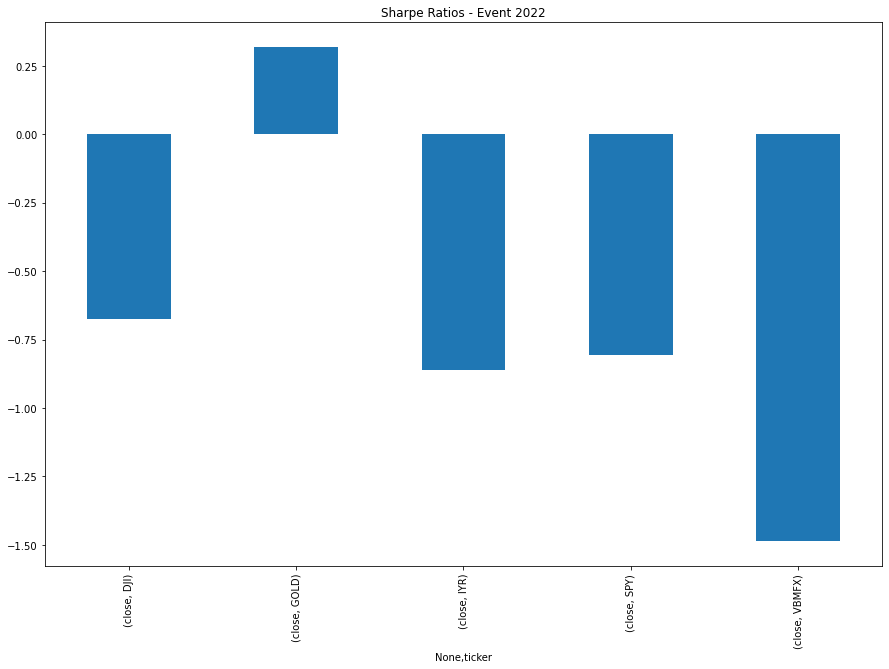

In [116]:
# Plotting the sharp ratios for securities
sharpe_ratios_event_2022.plot.bar(figsize=(15, 10), title="Sharpe Ratios - Event 2022")

<AxesSubplot:title={'center':'Daily Returns - Event 2022'}>

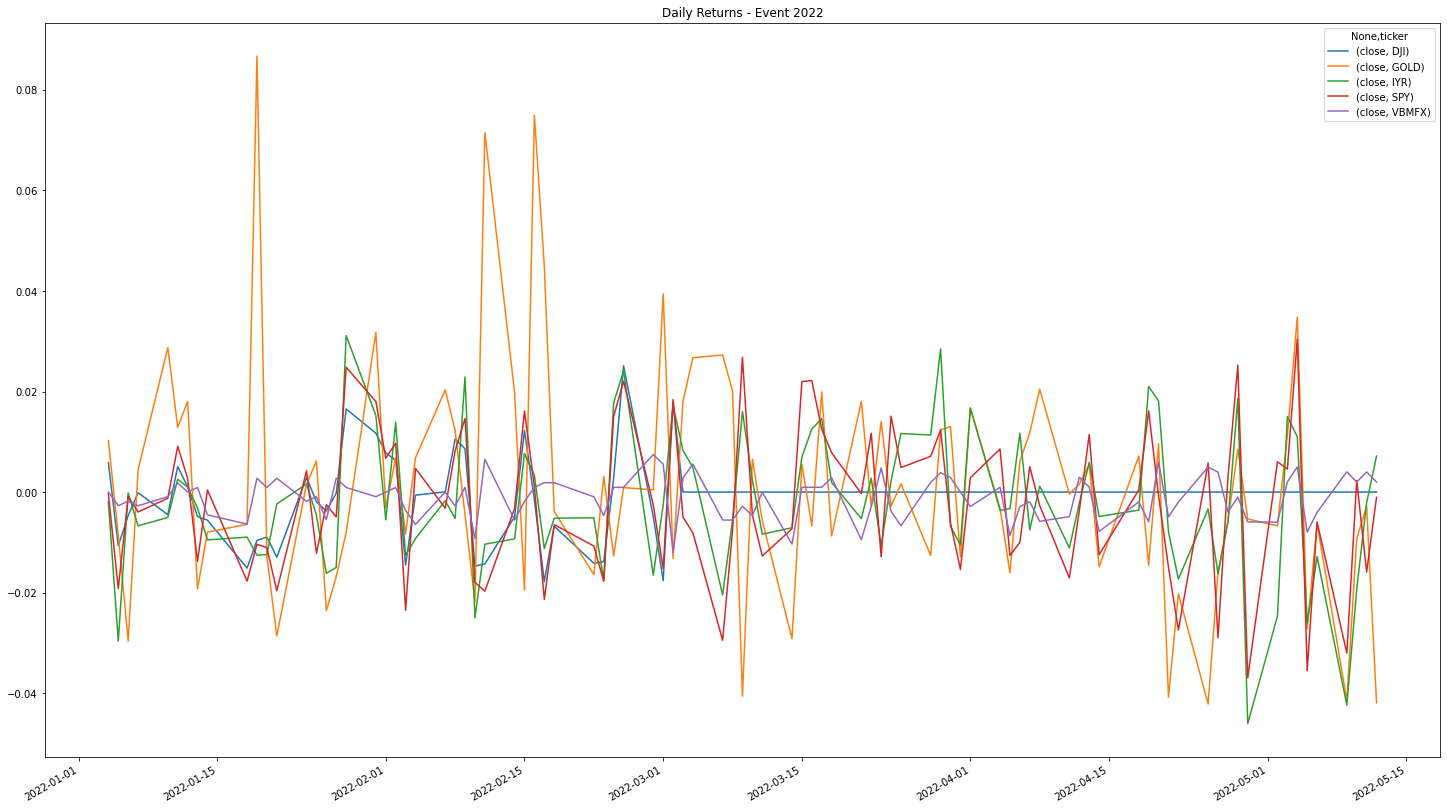

In [117]:
# Plotting the daily returns for securities
daily_returns_event_2022.plot(figsize=(25, 15), title="Daily Returns - Event 2022")